In [52]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",100)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

g = GaussianNB()
b = BernoulliNB()
k = KNeighborsClassifier()
log = LogisticRegression()
gbc = GradientBoostingRegressor()
r = RandomForestClassifier()
d = DecisionTreeClassifier()
xgbc = XGBRegressor()
nb = MultinomialNB()

import nltk
from nltk.stem import SnowballStemmer
from langdetect import detect
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("restaurant.csv")

In [3]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


In [5]:
df.date

0        2012-12-04 03:10:18
1        2014-01-17 00:50:50
2        2015-06-08 18:03:09
3        2016-12-19 16:15:29
4        2015-07-28 07:13:17
                ...         
10412    2019-11-17 20:39:36
10413    2019-11-12 02:23:07
10414    2019-12-12 03:27:22
10415    2019-11-01 21:00:51
10416    2019-11-30 22:36:56
Name: date, Length: 10417, dtype: object

In [6]:
df["Date"] = pd.to_datetime(df["date"])

df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Weekday"] = df["Date"].dt.dayofweek
df["WeekdayName"] = df["Date"].dt.day_name()
df["MonthName"] = df["Date"].dt.month_name()
df.drop(["Date"], axis = 1, inplace = True)
df.drop(["date"], axis =1, inplace =True)
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,Year,Month,Weekday,WeekdayName,MonthName
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012,12,1,Tuesday,December
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014,1,4,Friday,January
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015,6,0,Monday,June
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016,12,0,Monday,December
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015,7,1,Tuesday,July


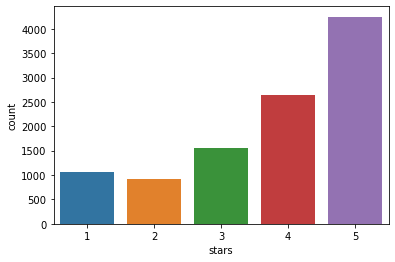

In [7]:
sns.countplot(df.stars);

In [8]:
yearbystar = pd.DataFrame(df.groupby("Year")["stars"].mean())

In [9]:
yearbystar

,stars
Year,
2012,3.899297
2013,3.930833
2014,3.809704
2015,3.870331
2016,3.613703
2017,3.685768
2018,3.714286
2019,3.807715


In [10]:
df.stars.value_counts()

5    4247
4    2636
3    1561
1    1056
2     917
Name: stars, dtype: int64

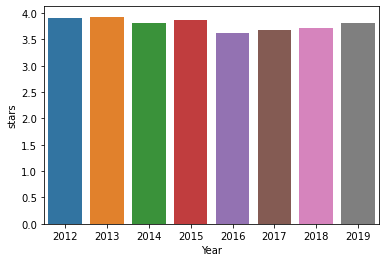

In [11]:
sns.barplot(x = yearbystar.index, y = yearbystar.stars);

In [12]:
df.loc[df["stars"] < 3, "sentiment"] = "negative"
df.loc[df["stars"] == 3, "sentiment"] = "neutral"
df.loc[df["stars"] > 3, "sentiment"] = "positive"

<AxesSubplot:xlabel='sentiment', ylabel='count'>

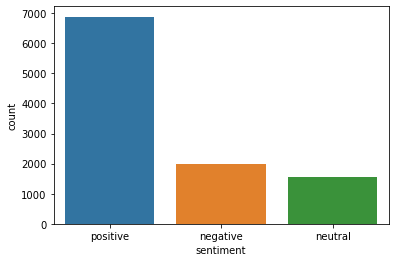

In [13]:
sns.countplot(df["sentiment"])

In [14]:
df.sentiment.value_counts()

positive    6883
negative    1973
neutral     1561
Name: sentiment, dtype: int64

In [15]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,Year,Month,Weekday,WeekdayName,MonthName,sentiment
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012,12,1,Tuesday,December,positive
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014,1,4,Friday,January,positive
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015,6,0,Monday,June,positive
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016,12,0,Monday,December,negative
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015,7,1,Tuesday,July,positive


In [16]:
df1 = df[["sentiment", "stars" , "text"]]

In [17]:
df1.head()

,sentiment,stars,text
0,positive,5,After getting food poisoning at the Palms hote...
1,positive,4,"""A feast worthy of Gods""\n\nBaccarnal Buffet i..."
2,positive,4,The crab legs are better than the ones at Wick...
3,negative,1,Not worth it! Too salty food and expensive! Th...
4,positive,5,I would give this infinite stars if I could. M...


### Cleaning text

In [18]:
import re
import string

alphanumeric = lambda x: re.sub('\w*\d\w*',' ',x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ',x.lower())
new_line = lambda x: re.sub('\n',' ', x)

df1['text'] = df.text.map(alphanumeric).map(punc_lower).map(new_line)

In [19]:
df1.head()

,sentiment,stars,text
0,positive,5,after getting food poisoning at the palms hote...
1,positive,4,a feast worthy of gods baccarnal buffet in ...
2,positive,4,the crab legs are better than the ones at wick...
3,negative,1,not worth it too salty food and expensive th...
4,positive,5,i would give this infinite stars if i could m...


In [20]:
text = []

In [21]:
for i in range(len(df1.text)):
    text.append(i)
text

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [22]:
from langdetect import detect
df1['language'] = df1["text"].apply(detect)

In [23]:
df1.drop(index = df1[df1["language"] != "en"].index, inplace = True)

In [24]:
import nltk
from textblob import TextBlob

In [25]:
df1.head()

,sentiment,stars,text,language
0,positive,5,after getting food poisoning at the palms hote...,en
1,positive,4,a feast worthy of gods baccarnal buffet in ...,en
2,positive,4,the crab legs are better than the ones at wick...,en
3,negative,1,not worth it too salty food and expensive th...,en
4,positive,5,i would give this infinite stars if i could m...,en


In [26]:
df1.text

0        after getting food poisoning at the palms hote...
1         a feast worthy of gods   baccarnal buffet in ...
2        the crab legs are better than the ones at wick...
3        not worth it  too salty food and expensive  th...
4        i would give this infinite stars if i could  m...
                               ...                        
10412    best buffet ever  irma was great  served us be...
10413    hollllllyyyy moleyyyy    this buffet was one f...
10414    the selection is amazing and all the food is e...
10415    one of the best buffets i ve had in vegas  my ...
10416    i got a chance to go to the bacchanal buffett ...
Name: text, Length: 10375, dtype: object

### Subjectivity and Polarity

In [27]:
df1[["polarity", "subjectivity"]] = df1["text"].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [28]:
df1.head()

,sentiment,stars,text,language,polarity,subjectivity
0,positive,5,after getting food poisoning at the palms hote...,en,0.367452,0.605702
1,positive,4,a feast worthy of gods baccarnal buffet in ...,en,0.217299,0.532126
2,positive,4,the crab legs are better than the ones at wick...,en,-0.134722,0.731944
3,negative,1,not worth it too salty food and expensive th...,en,-0.325000,0.400000
4,positive,5,i would give this infinite stars if i could m...,en,0.362500,0.725000


### WordCloud

In [ ]:
import stylecloud as sc
sc.gen_stylecloud()

In [29]:
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color = "orange",
                  mask = mask,
                  max_words= 50000,
                  stopwords = stopwords)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("WordCloud saved")
    path = "wc.png"
    display(Image.open(path))

In [30]:
negWC = df1[df1["sentiment"]=="negative"]

WordCloud saved


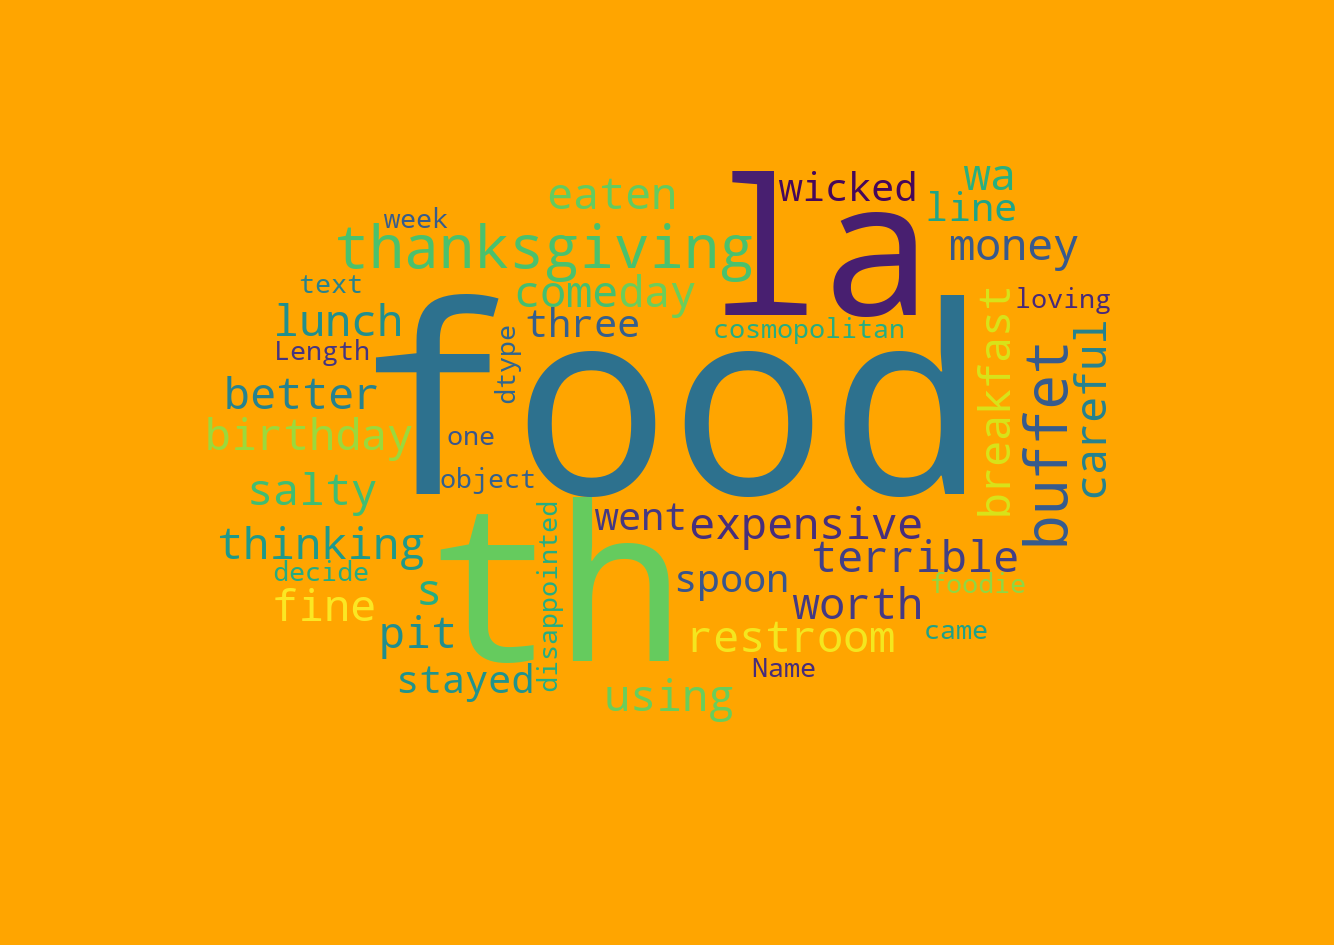

In [31]:
create_wordcloud(negWC.text)

In [32]:
posWC = df1[df1["sentiment"]=="positive"]

WordCloud saved


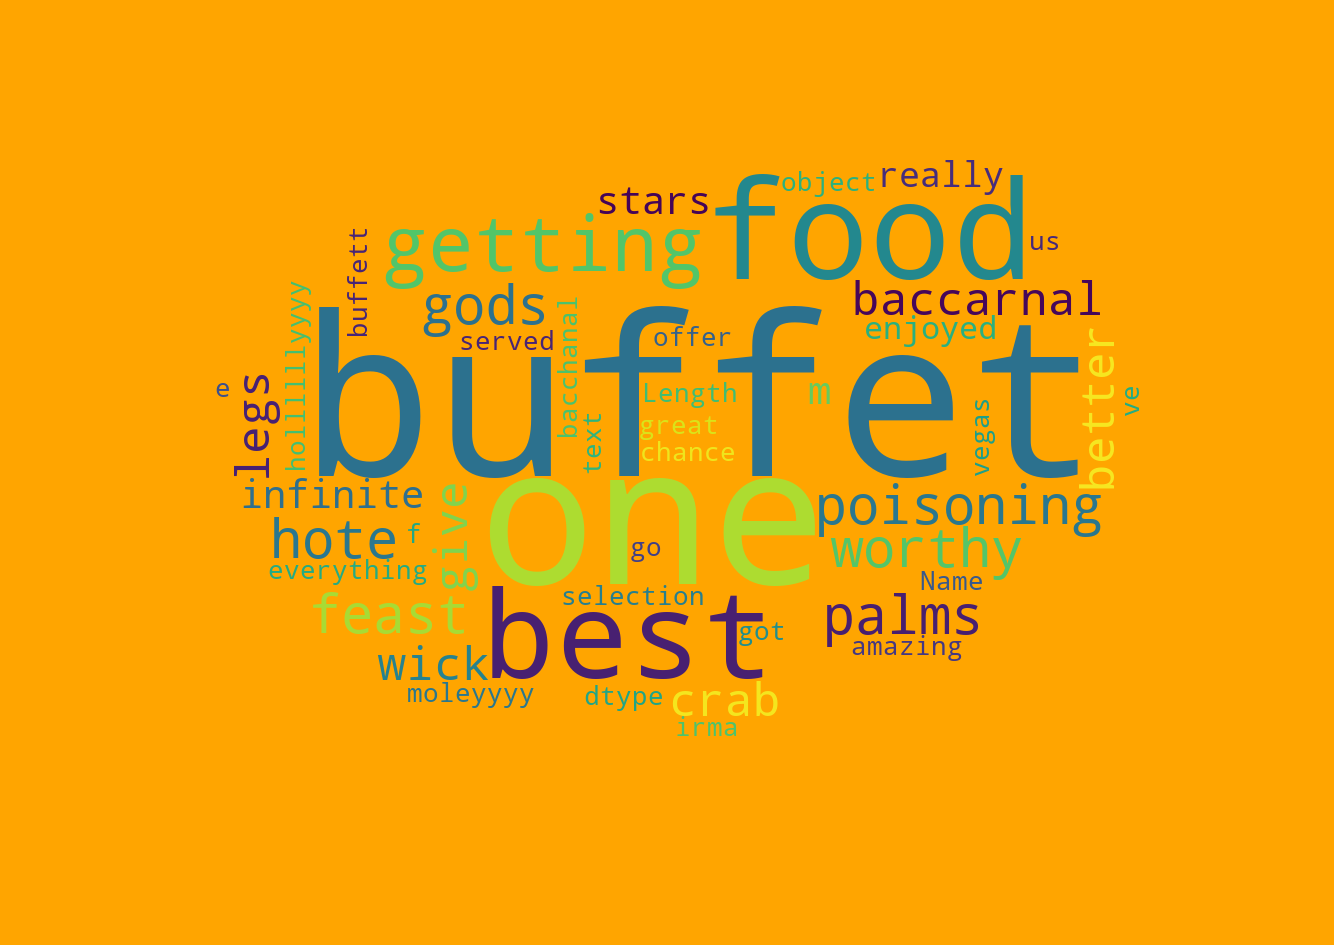

In [33]:
create_wordcloud(posWC.text)

### Removing Stopwords

In [34]:
dfAlg = df1[["text","sentiment"]]
dfAlg["removal_char"] = dfAlg["text"].str.replace("[^a-zA-Z0-9\s]","")
dfAlg.head()

,text,sentiment,removal_char
0,after getting food poisoning at the palms hote...,positive,after getting food poisoning at the palms hote...
1,a feast worthy of gods baccarnal buffet in ...,positive,a feast worthy of gods baccarnal buffet in ...
2,the crab legs are better than the ones at wick...,positive,the crab legs are better than the ones at wick...
3,not worth it too salty food and expensive th...,negative,not worth it too salty food and expensive th...
4,i would give this infinite stars if i could m...,positive,i would give this infinite stars if i could m...


In [38]:
#Tokenize Lowercase
import nltk
from nltk import word_tokenize
dfAlg["removal_char"] = dfAlg["removal_char"].apply(lambda x: word_tokenize(x.lower()))
dfAlg.head()

,text,sentiment,removal_char
0,after getting food poisoning at the palms hote...,positive,"[after, getting, food, poisoning, at, the, pal..."
1,a feast worthy of gods baccarnal buffet in ...,positive,"[a, feast, worthy, of, gods, baccarnal, buffet..."
2,the crab legs are better than the ones at wick...,positive,"[the, crab, legs, are, better, than, the, ones..."
3,not worth it too salty food and expensive th...,negative,"[not, worth, it, too, salty, food, and, expens..."
4,i would give this infinite stars if i could m...,positive,"[i, would, give, this, infinite, stars, if, i,..."


In [39]:
from textblob import TextBlob, Word
from nltk.corpus import stopwords
stop_words=list(stopwords.words("english"))
dfAlg["stopword_removal"]=dfAlg["removal_char"].apply(lambda x :[word for word in x if word not in stop_words])


In [40]:
dfAlg.head()

,text,sentiment,removal_char,stopword_removal
0,after getting food poisoning at the palms hote...,positive,"[after, getting, food, poisoning, at, the, pal...","[getting, food, poisoning, palms, hotel, scare..."
1,a feast worthy of gods baccarnal buffet in ...,positive,"[a, feast, worthy, of, gods, baccarnal, buffet...","[feast, worthy, gods, baccarnal, buffet, caesa..."
2,the crab legs are better than the ones at wick...,positive,"[the, crab, legs, are, better, than, the, ones...","[crab, legs, better, ones, wicked, spoon, huge..."
3,not worth it too salty food and expensive th...,negative,"[not, worth, it, too, salty, food, and, expens...","[worth, salty, food, expensive, furst, kast, v..."
4,i would give this infinite stars if i could m...,positive,"[i, would, give, this, infinite, stars, if, i,...","[would, give, infinite, stars, could, family, ..."


In [41]:

dfAlg["stopword_removal"] = dfAlg["stopword_removal"].apply(lambda x: " ".join(x))
dfAlg.head()

,text,sentiment,removal_char,stopword_removal
0,after getting food poisoning at the palms hote...,positive,"[after, getting, food, poisoning, at, the, pal...",getting food poisoning palms hotel scared eat ...
1,a feast worthy of gods baccarnal buffet in ...,positive,"[a, feast, worthy, of, gods, baccarnal, buffet...",feast worthy gods baccarnal buffet caesar pala...
2,the crab legs are better than the ones at wick...,positive,"[the, crab, legs, are, better, than, the, ones...",crab legs better ones wicked spoon huge prawns...
3,not worth it too salty food and expensive th...,negative,"[not, worth, it, too, salty, food, and, expens...",worth salty food expensive furst kast visit bu...
4,i would give this infinite stars if i could m...,positive,"[i, would, give, this, infinite, stars, if, i,...",would give infinite stars could family diamond...


In [42]:
#Lemmatize
from nltk import WordNetLemmatizer
dfAlg["stopword_removal"]=dfAlg["stopword_removal"].apply(lambda x : WordNetLemmatizer().lemmatize(x))
dfAlg.head()

,text,sentiment,removal_char,stopword_removal
0,after getting food poisoning at the palms hote...,positive,"[after, getting, food, poisoning, at, the, pal...",getting food poisoning palms hotel scared eat ...
1,a feast worthy of gods baccarnal buffet in ...,positive,"[a, feast, worthy, of, gods, baccarnal, buffet...",feast worthy gods baccarnal buffet caesar pala...
2,the crab legs are better than the ones at wick...,positive,"[the, crab, legs, are, better, than, the, ones...",crab legs better ones wicked spoon huge prawns...
3,not worth it too salty food and expensive th...,negative,"[not, worth, it, too, salty, food, and, expens...",worth salty food expensive furst kast visit bu...
4,i would give this infinite stars if i could m...,positive,"[i, would, give, this, infinite, stars, if, i,...",would give infinite stars could family diamond...


In [43]:
#Calculating Polarity
dfAlg["sentiment_polarity"]=dfAlg["stopword_removal"].apply(lambda x : TextBlob(x).sentiment.polarity)
dfAlg.sample(10)

,text,sentiment,removal_char,stopword_removal,sentiment_polarity
3617,really upsetting we were inline for lunch and ...,negative,"[really, upsetting, we, were, inline, for, lun...",really upsetting inline lunch manny people abl...,0.283333
7162,jo my server was great she was on point with m...,positive,"[jo, my, server, was, great, she, was, on, poi...",jo server great point drinks would come back j...,0.600000
1388,this is literally the best buffet i ve ever ha...,positive,"[this, is, literally, the, best, buffet, i, ve...",literally best buffet ever omg everything crab...,0.550000
3658,caesar s palace i would have done better to g...,negative,"[caesar, s, palace, i, would, have, done, bett...",caesar palace would done better go little caes...,-0.103264
5164,great decor that is all i can really say abou...,negative,"[great, decor, that, is, all, i, can, really, ...",great decor really say place would definitely ...,0.125000
533,i came here over labor day weekend which bump...,positive,"[i, came, here, over, labor, day, weekend, whi...",came labor day weekend bumped price find got r...,0.113690
10221,first off there are lot of fake pictures and v...,negative,"[first, off, there, are, lot, of, fake, pictur...",first lot fake pictures videos bacchanal buffe...,0.083333
6136,buffet was good but all the good stuff i e cr...,positive,"[buffet, was, good, but, all, the, good, stuff...",buffet good good stuff e crab legs macaroons g...,0.650000
5288,good thing is they have the option to get your...,negative,"[good, thing, is, they, have, the, option, to,...",good thing option get crab legs heated slightl...,0.279167
5376,this is my all time favorite buffet in las veg...,positive,"[this, is, my, all, time, favorite, buffet, in...",time favorite buffet las vegas many others cho...,0.271528


In [44]:
#Calculating Subjectivity
dfAlg["sentiment_subjectivity"]=dfAlg["stopword_removal"].apply(lambda x : TextBlob(x).sentiment.subjectivity)
dfAlg.sample(10)

,text,sentiment,removal_char,stopword_removal,sentiment_polarity,sentiment_subjectivity
3425,brunch on a sunday the reviews were right ...,positive,"[brunch, on, a, sunday, the, reviews, were, ri...",brunch sunday reviews right line manageable st...,0.287004,0.498115
9007,nothing less than amazing this buffet is loc...,positive,"[nothing, less, than, amazing, this, buffet, i...",nothing less amazing buffet located within cae...,0.203078,0.557844
8262,beware expect long lines saturday at di...,negative,"[beware, expect, long, lines, saturday, at, di...",beware expect long lines saturday make buffet ...,0.108333,0.591667
1040,omg days ago my friends and i went back t...,positive,"[omg, days, ago, my, friends, and, i, went, ba...",omg days ago friends went back bacchanal buffe...,0.240000,0.240000
9395,this place is not what you think it is the f...,negative,"[this, place, is, not, what, you, think, it, i...",place think food quilting low place smell like...,0.165000,0.335000
7824,hands down the best buffet in las vegas it do...,positive,"[hands, down, the, best, buffet, in, las, vega...",hands best buffet las vegas live hype suggest ...,0.277386,0.676250
3519,i came here from brunch on a saturday after he...,neutral,"[i, came, here, from, brunch, on, a, saturday,...",came brunch saturday hearing hype buffet say d...,0.205983,0.568803
6940,this was a good buffet it was a good buffet ...,positive,"[this, was, a, good, buffet, it, was, a, good,...",good buffet good buffet great buffet like hear...,0.400000,0.624471
6504,best buffet i ve ever had granted i have onl...,positive,"[best, buffet, i, ve, ever, had, granted, i, h...",best buffet ever granted tried bacchanal wicke...,0.250000,0.500000
1236,we stop here every time we going vegas i thin...,positive,"[we, stop, here, every, time, we, going, vegas...",stop every time going vegas think best buffet ...,0.500000,0.275000


In [45]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
vect=CountVectorizer()
X=vect.fit_transform(dfAlg["stopword_removal"])
X.shape

(10375, 17762)

In [46]:
def df_sentence(score):
    if score>0.2:
        return 2
    elif score<0.2:
        return 0
    else:
        return 1
dfAlg["class"]=dfAlg["sentiment_polarity"].apply(lambda x: df_sentence(x)) 

In [47]:
dfAlg.head()

,text,sentiment,removal_char,stopword_removal,sentiment_polarity,sentiment_subjectivity,class
0,after getting food poisoning at the palms hote...,positive,"[after, getting, food, poisoning, at, the, pal...",getting food poisoning palms hotel scared eat ...,0.348197,0.611273,2
1,a feast worthy of gods baccarnal buffet in ...,positive,"[a, feast, worthy, of, gods, baccarnal, buffet...",feast worthy gods baccarnal buffet caesar pala...,0.220060,0.532956,2
2,the crab legs are better than the ones at wick...,positive,"[the, crab, legs, are, better, than, the, ones...",crab legs better ones wicked spoon huge prawns...,-0.134722,0.731944,0
3,not worth it too salty food and expensive th...,negative,"[not, worth, it, too, salty, food, and, expens...",worth salty food expensive furst kast visit bu...,-0.100000,0.400000,0
4,i would give this infinite stars if i could m...,positive,"[i, would, give, this, infinite, stars, if, i,...",would give infinite stars could family diamond...,0.362500,0.725000,2


In [48]:
dfAlg1 = dfAlg[["class","stopword_removal"]]

In [49]:
y = dfAlg1["class"]
x = dfAlg1["stopword_removal"]

In [50]:
x_dtm = vect.fit_transform(x)

In [95]:
algorithms = [b, k, nb, log, d, r]
names = ["BernoulliNB","KNeighborsClassifier",'MultinomialNB', 'LogisticRegression', 'DecisionTreeClassifier', "RandomForestClassifier"] 
def classification(): 
    accuracy = [] 
    precision = [] 
    recall = [] 
    f1 =[] 
    for i in range(len(algorithms)):
        algorithms[i].fit(x_dtm, y) 
    for i in range(len(algorithms)): 
        accuracy.append(accuracy_score(y, algorithms[i].predict(x_dtm))) 
        precision.append(precision_score(y, algorithms[i].predict(x_dtm),average = "weighted")) 
        recall.append(recall_score(y, algorithms[i].predict(x_dtm),average = "weighted")) 
        f1.append(f1_score(y, algorithms[i].predict(x_dtm),average = "weighted")) 
   

    met = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall', 'F1'], index = names) 
    met['Accuracy'] = accuracy 
    met['Precision'] = precision 
    met['Recall'] = recall 
    met["F1"] = f1 
    return met 

In [96]:
classification()

,Accuracy,Precision,Recall,F1
BernoulliNB,0.702361,0.697696,0.702361,0.693936
KNeighborsClassifier,0.714795,0.772340,0.714795,0.676054
MultinomialNB,0.857060,0.857579,0.857060,0.854199
LogisticRegression,0.997880,0.997881,0.997880,0.997879
DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000
RandomForestClassifier,1.000000,1.000000,1.000000,1.000000


In [ ]:
# algorithms = [g,b,k,log,gbc,r,d,xgbc,nb]
# names=["GaussianNB","BernoulliNB","KNeighborsClassifier",
#       "LogisticRegression","GradientBoostingRegressor","RandomForestClassifier",
#       "DecisionTreeClassifier","XGBRegressor","MultinomialNB"]